In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling
from pandas_profiling import ProfileReport

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

import scipy.stats as stats
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
col_names = ["duration","protocol_type","service","flag",
             "src_bytes","dst_bytes","land", "wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations", "num_shells","num_access_files",
             "num_outbound_cmds","is_host_login", "is_guest_login","count",
             "srv_count","serror_rate", "srv_serror_rate",
             "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate",
             "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
             "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate",
             "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


train = pd.read_csv('H:/data science full/analytics lab/projects/3.Network intrusion Detection System/NSL_Dataset/Train.csv',header=None, names = col_names)
test = pd.read_csv('H:/data science full/analytics lab/projects/3.Network intrusion Detection System/NSL_Dataset/Test.csv',header=None, names = col_names)
# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',train.shape)
print('Dimensions of the Test set:',test.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
train['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [7]:
train.loc[train.attack!= 'normal','attack'] = 'Anomaly'
train.loc[train.attack== 'normal','attack'] = 'Normal'

In [8]:
train.attack.value_counts()

Normal     67343
Anomaly    58630
Name: attack, dtype: int64

In [9]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Anomaly,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Anomaly,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Anomaly,20


In [10]:
round(train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.14,2604.52,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.74,5870331.18,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.11,4021269.15,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.00,0.01,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.02,0.25,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.00,0.01,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.20,2.15,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.00,0.05,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.40,0.49,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.28,23.94,0.0,0.00,0.00,0.00,7.479000e+03


In [11]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    125973
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [12]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [13]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [14]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [15]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [16]:
# separate the categorical and continuous variable names
numeric_var_names = [key for key in dict(train.dtypes) 
                     if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(train.dtypes) 
                     if dict(train.dtypes)[key] in ['object']]

In [17]:
# print the variable names in both the variables
print('numeric are:',numeric_var_names)
print()
print('categoriacal are:',cat_var_names)


numeric are: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']

categoriacal are: ['protocol_type', 'service', 'flag', 'attack']


In [18]:
# get the dataframe of only continuous variables
train_num = train[numeric_var_names]

In [19]:
# get the data audit report for all the variables
num_summary = train_num.apply(continuous_var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


From the above we can see clearly see presence of outliers src_bytes and dst_bytes
and theare are no missing values as well
the total count is 125973
there are certain bool variables as well 
Also num_outbound_cmds column is redundant it is not having any values we can drop this from train

In [20]:
train_cat = train[cat_var_names]
train_cat

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,Normal
1,udp,other,SF,Normal
2,tcp,private,S0,Anomaly
3,tcp,http,SF,Normal
4,tcp,http,SF,Normal
...,...,...,...,...
125968,tcp,private,S0,Anomaly
125969,udp,private,SF,Normal
125970,tcp,smtp,SF,Normal
125971,tcp,klogin,S0,Anomaly


In [21]:
cat_summary = train_cat.apply(categorical_var_summary)
cat_summary

,protocol_type,service,flag,attack
N,125973,125973,125973,125973
NMISS,0,0,0,0
MODE,tcp,http,SF,Normal
FREQ,102689,40338,74945,67343
PERCENT,81.52,32.02,59.49,53.46


So from above it is evident that 53% of the time there was no attack the activity is normal
but 47% of the time it was attack
moreover 81% we have Transmission Control Protocol

In [22]:
print(train_cat['protocol_type'].unique())
print()
print(train_cat['service'].unique())
print()
print(train_cat['flag'].unique())
print()
print(train_cat['attack'].unique())

['tcp' 'udp' 'icmp']

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']

['Normal' 'Anomaly']


In [23]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'last_flag'],
      dtype='object')

In [24]:
train.rename(columns={"count": "cnt"}, inplace = True)

In [25]:
train.columns 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'cnt',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'last_flag'],
      dtype='object')

In [26]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
train['protocol_type'] = train['protocol_type'].map(pmap)

In [27]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
train['flag'] = train['flag'].map(fmap)

In [28]:
#flag feature mapping
amap = {'Normal':0,'Anomaly':1}
train['attack'] = train['attack'].map(amap)

In [29]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,1,ftp_data,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,other,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,private,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,http,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,http,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


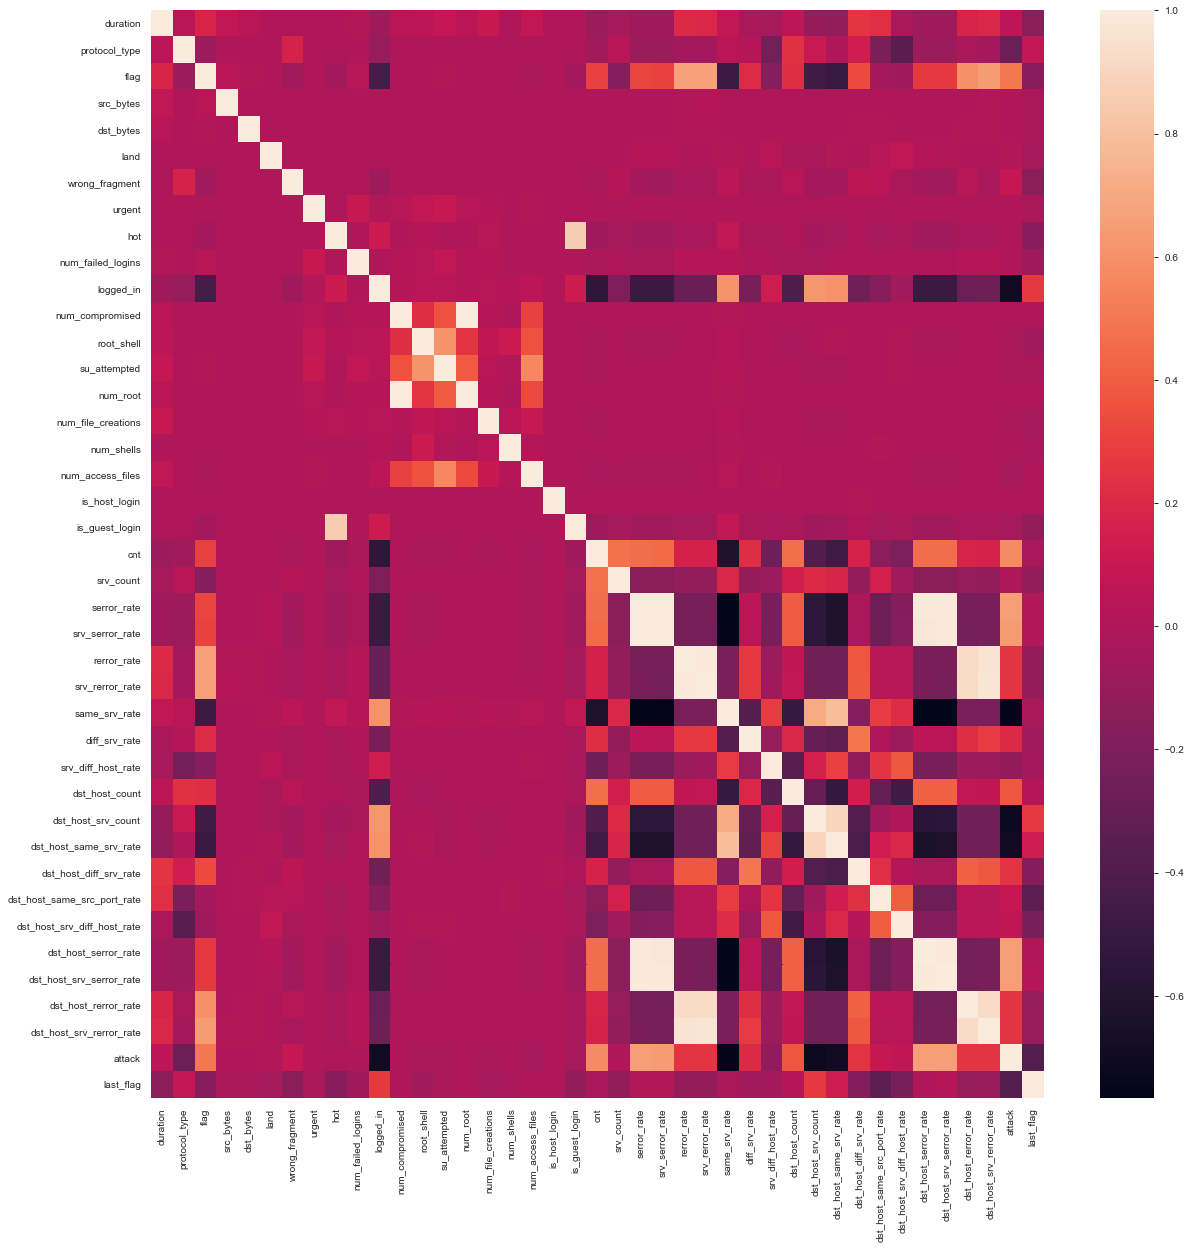

In [30]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [31]:
train.corr()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
duration,1.000000,0.038241,0.177317,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,...,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.048785,-0.156311
protocol_type,0.038241,1.000000,-0.077823,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,-0.003370,...,0.001702,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,-0.281355,0.082775
flag,0.177317,-0.077823,1.000000,0.041077,0.009936,0.005594,-0.055844,-0.004828,-0.050480,0.028469,...,-0.502285,0.332226,-0.047820,-0.070276,0.270121,0.275920,0.599117,0.643998,0.496916,-0.160836
src_bytes,0.070737,-0.000974,0.041077,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.005921,-0.022592
dst_bytes,0.034878,-0.000608,0.009936,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.004118,-0.018076
land,-0.001553,-0.001757,0.005594,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,0.007191,-0.037038
wrong_fragment,-0.009866,0.169535,-0.055844,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,...,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,0.095905,-0.157130
urgent,0.003830,-0.000965,-0.004828,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.002787,-0.016411
hot,0.000705,-0.011857,-0.050480,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,...,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.013083,-0.160013
num_failed_logins,0.009528,-0.003370,0.028469,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.003755,-0.073178


In [32]:
train[train.columns[:]].corr()['attack'][:].sort_values()

same_srv_rate                 -0.751913
dst_host_srv_count            -0.722535
dst_host_same_srv_rate        -0.693803
logged_in                     -0.690171
last_flag                     -0.379707
protocol_type                 -0.281355
srv_diff_host_rate            -0.119377
is_guest_login                -0.039279
num_access_files              -0.036701
su_attempted                  -0.022448
num_file_creations            -0.021271
root_shell                    -0.020285
hot                           -0.013083
num_root                      -0.011452
num_compromised               -0.010198
num_shells                    -0.009472
num_failed_logins             -0.003755
urgent                        -0.002787
is_host_login                 -0.002629
srv_count                      0.000771
dst_bytes                      0.004118
src_bytes                      0.005921
land                           0.007191
duration                       0.048785
dst_host_srv_diff_host_rate    0.062332


In [33]:
#Visualization
def bar_graph(feature):
    train[feature].value_counts().plot(kind="bar")

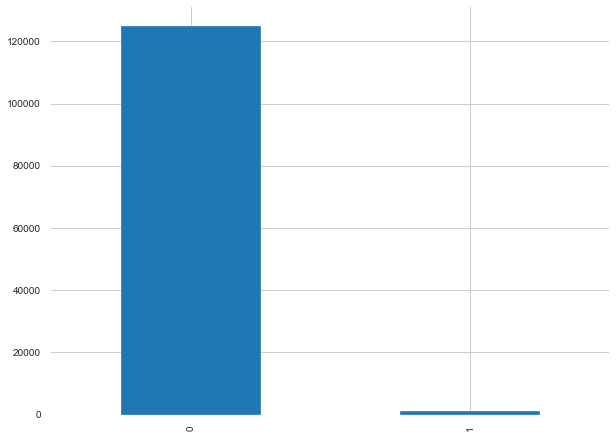

In [34]:
bar_graph('is_guest_login')

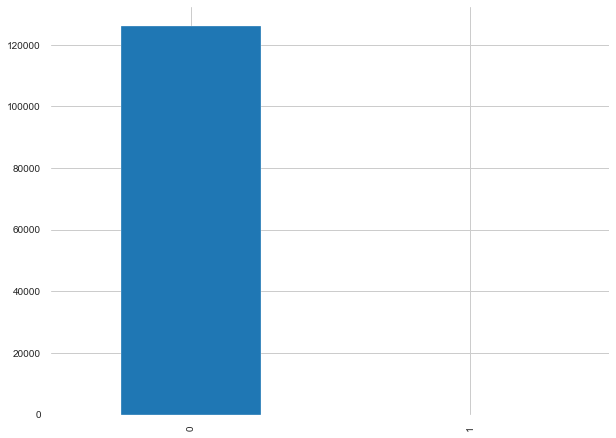

In [35]:
bar_graph('is_host_login')

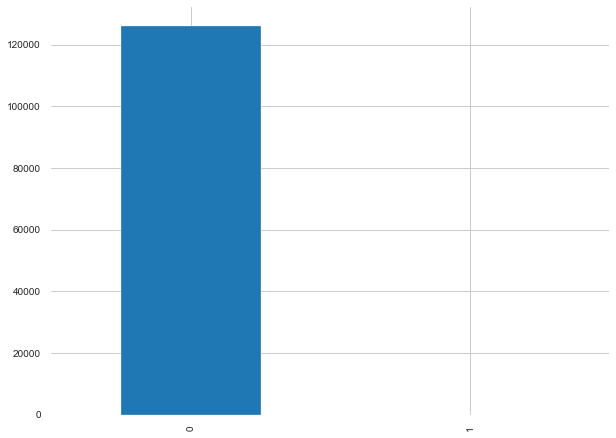

In [36]:
bar_graph('land')

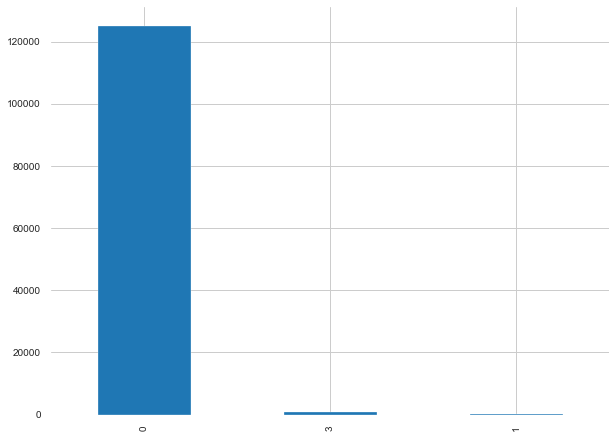

In [37]:
bar_graph('wrong_fragment')

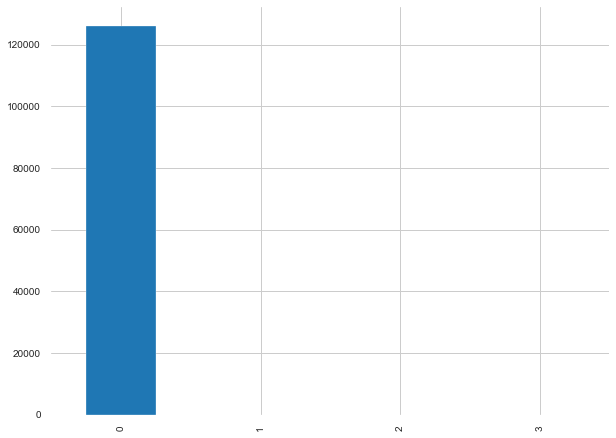

In [38]:
bar_graph('urgent')

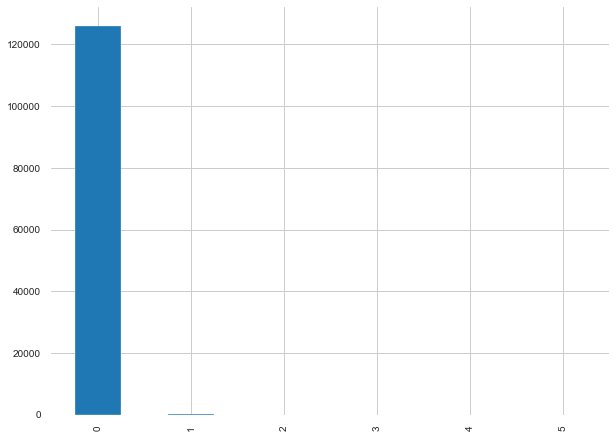

In [39]:
bar_graph('num_failed_logins')

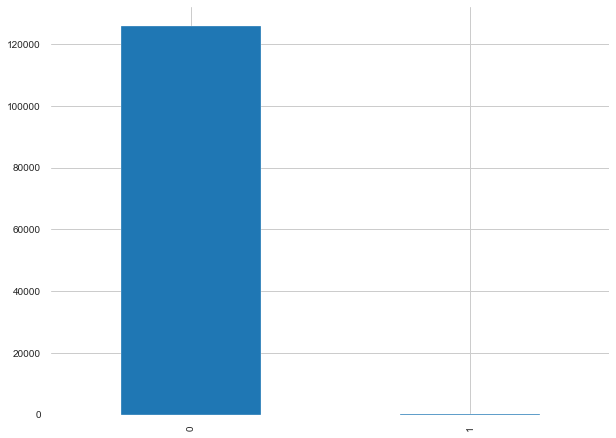

In [40]:
bar_graph('root_shell')

In [41]:
train[train.columns[:]].corr()['attack'][:].sort_values()

same_srv_rate                 -0.751913
dst_host_srv_count            -0.722535
dst_host_same_srv_rate        -0.693803
logged_in                     -0.690171
last_flag                     -0.379707
protocol_type                 -0.281355
srv_diff_host_rate            -0.119377
is_guest_login                -0.039279
num_access_files              -0.036701
su_attempted                  -0.022448
num_file_creations            -0.021271
root_shell                    -0.020285
hot                           -0.013083
num_root                      -0.011452
num_compromised               -0.010198
num_shells                    -0.009472
num_failed_logins             -0.003755
urgent                        -0.002787
is_host_login                 -0.002629
srv_count                      0.000771
dst_bytes                      0.004118
src_bytes                      0.005921
land                           0.007191
duration                       0.048785
dst_host_srv_diff_host_rate    0.062332


In [42]:
# # profiling using pandas profiling
# pandas_profiling.ProfileReport(train)

In [43]:
# Train and Test split
train, test = train_test_split(train, test_size = 0.3, random_state =  42)

In [44]:
print(train.shape)
print(test.shape)

(88181, 42)
(37792, 42)


In [45]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'cnt',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'last_flag'],
      dtype='object')

In [46]:
all_columns = "+".join(train.columns.difference(['attack','service','is_host_login','is_guest_login','land','urgent','num_failed_logins','service','num_compromised',
                                                'num_root','num_file_creations','num_access_files','wrong_fragment','num_shells','root_shell','dst_bytes','duration','hot','src_bytes','dst_host_srv_diff_host_rate',
                                                 'dst_host_same_src_port_rate','srv_serror_rate','srv_rerror_rate','serror_rate',
                                                 'dst_host_srv_serror_rate','rerror_rate','dst_host_srv_rerror_rate',
                                                'same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','su_attempted','dst_host_rerror_rate','srv_count']))                   
                                                

In [47]:
my_formula = "attack~" + all_columns

In [48]:
# execute a model for the X variables
m1 = sm.logit(my_formula,data = train).fit()

Optimization terminated successfully.
         Current function value: 0.136253
         Iterations 9


In [49]:
print(m1.summary())

                           Logit Regression Results                           
Dep. Variable:                 attack   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88170
Method:                           MLE   Df Model:                           10
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.8027
Time:                        01:54:58   Log-Likelihood:                -12015.
converged:                       True   LL-Null:                       -60894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12.7859      0.167     76.710      0.000      12.459      13.113
cnt                        0.0091      0.000     38.545      0.000       0.009       0.010
diff

In [50]:
# run the dmatrices
a, b = dmatrices(my_formula, data = train, return_type = 'dataframe')

# get the VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) 
for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,88.216449,Intercept
1,1.788908,cnt
2,1.392641,diff_srv_rate
3,1.614454,dst_host_count
4,1.547832,dst_host_diff_srv_rate
5,1.647175,dst_host_serror_rate
6,1.399617,flag
7,1.168658,last_flag
8,2.138294,logged_in
9,1.298599,protocol_type


In [51]:
# predict the probabilities
p = m1.predict(train)

In [52]:
# get the AUC
metrics.roc_auc_score(train['attack'], p)*100

98.75613809534411

In [53]:
# empty dataframe
somersd_df = pd.DataFrame()

# iterate for each of the X - dependant variables and get the Somer's D value
for num_variable in train.columns.difference(['attack','service','is_host_login','is_guest_login','land','urgent','num_failed_logins','service','num_compromised',
                                                'num_root','num_file_creations','num_access_files','wrong_fragment','num_shells','root_shell','dst_bytes','duration','hot','src_bytes','dst_host_srv_diff_host_rate',
                                                 'dst_host_same_src_port_rate','srv_serror_rate','srv_rerror_rate','serror_rate',
                                                 'dst_host_srv_serror_rate','rerror_rate','dst_host_srv_rerror_rate',
                                                'same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','su_attempted','dst_host_rerror_rate','srv_count']):
    
    # execute teh logit model
    logreg = sm.logit(formula = str('attack ~ ') + str(num_variable), data = train).fit()
    
    # get the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # name the column of the df as score
    y_score.columns = ['Score']
    
    # calculate the Somer's D values
    somers_d = 2 * metrics.roc_auc_score(train['attack'], y_score) - 1
    
    # place the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # append the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.474065
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.666218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613830
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655798
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434691
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.503018
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.595573
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.410079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.647557
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.683039
  

In [54]:
y_score

,Score
0,0.257472
1,0.486835
2,0.486835
3,0.486835
4,0.486835
...,...
88176,0.486835
88177,0.486835
88178,0.486835
88179,0.486835


In [55]:
# print the Somer's D values for all variables
# Bi-variate analysis to check the predictive power of each independent against dependent
somersd_df.sort_values(by = 'SomersD', ascending = False)

,Variable Name,SomersD
0,flag,0.715148
0,diff_srv_rate,0.690572
0,logged_in,0.676357
0,dst_host_diff_srv_rate,0.655557
0,cnt,0.642881
0,dst_host_serror_rate,0.622634
0,last_flag,0.526523
0,dst_host_count,0.41641
0,srv_diff_host_rate,0.274495
0,protocol_type,0.219056


In [56]:
# predict the values on training and testing
train['pred_prob'] = m1.predict(train)
train_predict = m1.predict(train)
test_predict = m1.predict(test)
train.head(20)

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,pred_prob
49911,0,1,http,2,0,0,0,0,0,0,...,0.00,0.33,0.27,0.00,0.00,1.00,1.00,0,21,0.131249
46670,0,1,private,1,0,0,0,0,0,0,...,0.08,0.00,0.00,1.00,1.00,0.00,0.00,1,21,0.923081
100564,0,1,http,0,230,3864,0,0,0,0,...,0.00,0.04,0.04,0.00,0.01,0.00,0.01,0,21,0.000602
51601,0,1,ftp_data,0,567,0,0,0,0,0,...,0.06,0.01,0.03,0.00,0.00,0.00,0.00,0,21,0.001011
123170,9080,1,IRC,3,1603,8195,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.09,0.65,0,19,0.527015
7613,0,2,domain_u,0,46,81,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0,18,0.358087
16871,0,1,private,1,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1,20,0.990278
50795,0,1,http,2,0,0,0,0,0,0,...,0.00,0.02,0.14,0.00,0.00,1.00,1.00,0,21,0.070643
37406,0,1,auth,0,10,38,0,0,0,0,...,0.03,0.01,0.17,0.00,0.00,0.00,0.00,0,21,0.000833
38978,0,1,private,2,0,0,0,0,0,0,...,0.09,0.00,0.00,0.00,0.00,1.00,1.00,1,21,0.756110


In [57]:
# model accuracy | Method 1: AUC
train_auc = metrics.roc_auc_score(train['attack'], train_predict)
test_auc = metrics.roc_auc_score(test['attack'], test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9875613809534411
The AUC for the model built on the Test Data is :  0.9870309602579416


In [58]:
print("Response rate (Proportion of 1 vs 0):",train['attack'].mean())
print("Average of predicted probalities:", train_predict.mean())

Response rate (Proportion of 1 vs 0): 0.46405688300200726
Average of predicted probalities: 0.4640568830020075


In [59]:
# Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(train_predict)
train_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
train_pf = pd.concat([train['attack'], train_predicted_prob], axis = 1)
train_pf.columns = ['actual', 'prob']

In [60]:
train_predicted_prob
train_pf

,actual,prob
49911,0,0.131249
46670,1,0.923081
100564,0,0.000602
51601,0,0.001011
123170,0,0.527015
...,...,...
119879,1,0.983680
103694,1,0.988801
860,1,0.937654
15795,0,0.000582


In [61]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(test_predict)
test_predicted_prob.columns = ['prob']

# making a DataFrame with actual and prob columns
test_pf = pd.concat([test['attack'], test_predicted_prob], axis=1)
test_pf.columns = ['actual','prob']

In [62]:
test_pf

,actual,prob
378,0,0.004713
32038,1,0.989497
86399,1,0.991149
74412,1,0.796608
52951,1,0.997108
...,...,...
83080,1,0.994979
23939,0,0.680711
26956,0,0.000713
115117,0,0.000798


In [63]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( train['attack'],
                            train_predict>.23,[1,0])
cm

array([[40025,   896],
       [ 4515, 42745]], dtype=int64)

Text(0.5, 44.0, 'Predicted label')

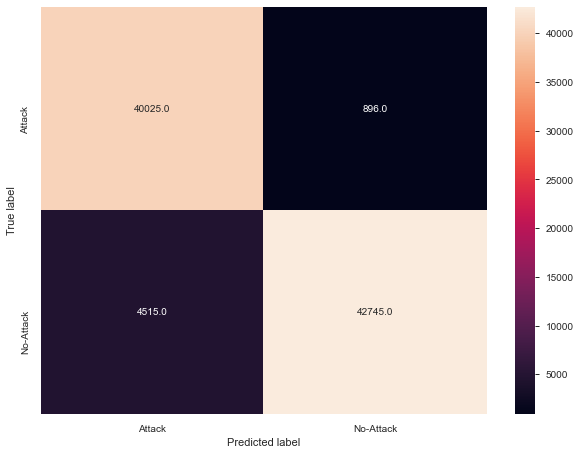

In [64]:
sns.heatmap(cm, annot=True,  fmt='.1f', xticklabels = ["Attack", "No-Attack"] , yticklabels = ["Attack", "No-Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [65]:
# Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_pf.copy()

for cut_off in np.linspace(0,1,100):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df.head(2)

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.0,0.000000,0.464057,1.000000
0,0.010101,1.0,0.700677,0.839580,1.700677


In [66]:
# cut-off based on highest sum(sensitivity + specicity) - common way of identifying cut-off
roc_like_df[roc_like_df['total'] == roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.444444,0.959141,0.949788,0.954128,1.908929


In [67]:
# cut-off based on highest accuracy - can be misleading in case imbalanced data
roc_like_df[roc_like_df['accuracy'] == roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.464646,0.956404,0.952285,0.954196,1.908689


In [68]:
test_pf['predicted'] = test_pf['prob'].apply(lambda x: 1 if x > 0.44 else 0)
train_pf['predicted'] = train_pf['prob'].apply(lambda x: 1 if x > 0.44 else 0)

In [69]:
# confusion matrix of training dataset
pd.crosstab(train_pf['actual'], train_pf['predicted'])

predicted,0,1
actual,,
0,44859,2401
1,1656,39265


In [70]:
# confusion matrix of testing dataset
pd.crosstab(test_pf['actual'], test_pf['predicted'])

predicted,0,1
actual,,
0,19043,1040
1,698,17011


In [71]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_pf.actual, train_pf.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_pf.actual, test_pf.predicted))

The overall accuracy score for the Train Data is :  0.9539923566301131
The overall accuracy score for the Test Data  is :  0.9540114309906859
